# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The No Show Appointment dataset consist of patients' demographic and health information (14 associated variables or characteristics) collected from approximately 110,527 medical appointments in Brazil. The dataset is focused on answering the question of whether or not the patients show up for their appointments. The following information below are contained in the patients' data:
> - Patient Identification Number
> - Appointment Identifier
> - Gender (Male M or Female F)
> - Scheduled Day of Appointment
> - Appointment Day
> - Age of Patients
> - Neighbourhood (Where the hospitals are located)
> - Scholarship (If patients are enrolled in the [Brasilian welfare program Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia))
> - Hipertension (Hypertension)
> - Diabetes
> - Alcoholism
> - Handcap
> - SMS Received as reminders
> - No-show: __‘No’__ if the patient showed up, or __‘Yes’__ if they did not show up to their appointment

_Reference for Dataset on [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments)_ 


### Question(s) for Analysis

**Question One**: What are the demographic distributions of the patients?
> _- By Gender_
> _- By Scholarship_
> _- By Health Conditions_
> _- Physical Disability_

**Question Two**: Is there any impact of the health conditions and attendance at appoinment by the patients?

**Question Three**: Does early scheduling impact their attendance at the appointments?

**Question Four**: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

<a id='wrangling'></a>
## Data Wrangling

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [121]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#df = pd.read_csv('noshowappointments.csv')
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Checking for the dimensions of the dataset**

In [3]:
df.shape

(110527, 14)

In [4]:
print(f"The shape of the dataset is {df.shape}, with {df.shape[0]} rows/observations and {df.shape[1]} columns/variables")

The shape of the dataset is (110527, 14), with 110527 rows/observations and 14 columns/variables


> **Checking the dataset for rows with missing/null values and datatypes**

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- _The dataset does not have any row(s) with null values along the columns_
- _The dataset has 9 variables as either int64 or float which are important in the description of the data_
- _The 'ScheduledDay' and 'AppointmentDay' are objects to be converted to datetime_

> **Checking the dataset for duplicated rows**

In [7]:
df.duplicated().sum()

0

- _The dataset does not have any duplicated rows_

> **Describing the dataset**

In [8]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

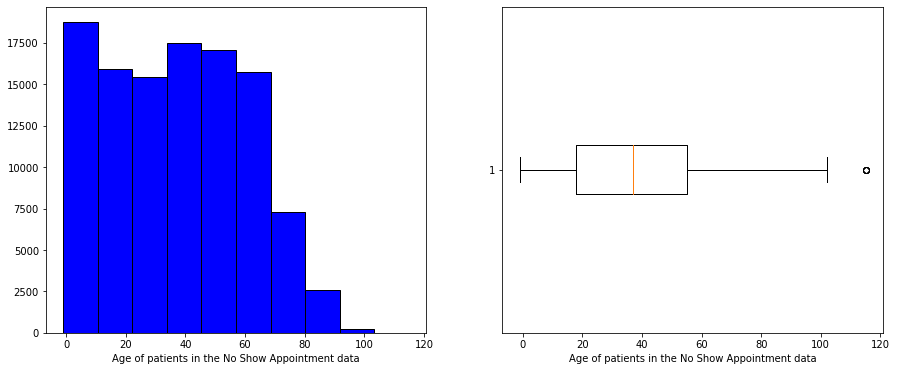

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].hist(df['Age'], color = 'blue', edgecolor = 'black');
ax[1].boxplot(df['Age'], vert=False);
ax[0].set_xlabel('Age of patients in the No Show Appointment data');
ax[1].set_xlabel('Age of patients in the No Show Appointment data');

In [10]:
## How many outliers in the data based on the age distribution of the patients
Q3 = np.quantile(df['Age'], 0.75)
Q1 = np.quantile(df['Age'], 0.25)
lower_boundary = Q1 - 1.5 *(Q3-Q1)
upper_boundary = Q3 + 1.5 *(Q3-Q1)
print(f"There are {len(df[df['Age'] < lower_boundary])} outliers lesser than the lower boundary of {lower_boundary}")
print(f"There are {len(df[df['Age'] > upper_boundary])} outliers greater than the upper boundary of {upper_boundary}")

There are 0 outliers lesser than the lower boundary of -37.5
There are 5 outliers greater than the upper boundary of 110.5


In [11]:
#Get unique values for each variables
for i in df[['Age','Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']].columns:
    print(i)
    print(df[i].unique())
    print('\n')

Age
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


Gender
['F' 'M']


Neighbourhood
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIV

In [12]:
## How many rows contain the negative age for patients
len(df[df['Age'] < 0])

1

In [13]:
## How many rows contain wrong handicap designation of more than 1
len(df[df['Handcap'] > 1])

199

- _The mean(sd) age of the patients is 37(23), indicating a large spread of the age of the patients around the mean and a large subset of the population are less than the mean/median age_
- _The dataset contains outliers based on the patient age (indicating patients who are very old) - the maximum age is far from the 75percentile_
- _The dataset contains patient(s) negatively aged '-1'. This cannot be the true age (possibly a mistake at entry)_
- _The dataset contains patient(s) with wrong handicap designation of more than 1 (It should be True[1] or False[0])_

### Data Cleaning
> * All the rows in the dataset have no-missing/complete values. No need for dropping or filling the rows.
> * The No Show Appointment dataset has a relatively large number of observations (110,527). I would be dropping the rows observed to contains negative age (1 row), outliers (5 rows), and wrong handicap designation (199 rows). These rows make up about 205 out of 110,527 (0.002%) of the data.
> * The 'ScheduledDay' and 'AppointmentDay' columns are to be converted to datetimes.

In [14]:
# After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.

> Dropping row(s) with negative age '-1'

In [15]:
# Drop 1 rows with negative age using the index
df.drop(df[df['Age'] < 0].index, inplace=True)

In [16]:
# Confirm the updated number of rows after dropping the rows with negative age
print(len(df))

110526


> Dropping row(s) with age outliers

In [17]:
# Drop 5 rows with age greater than the upper boundary using the index
df.drop(df[df['Age'] > upper_boundary].index, inplace=True)

In [18]:
# Confirm the updated number of rows after dropping the rows with outliers
print(len(df))

110521


> Dropping row(s) with wrong handicap designations

In [19]:
# Drop 199 rows with age greater than the upper boundary using the index
df.drop(df[df['Handcap'] > 1].index, inplace=True)

In [20]:
# Confirm the updated number of rows after dropping the rows with wrong handicap designations
print(len(df))

110322


> Convert 'ScheduledDay' and 'AppointmentDay' columns to pandas datetime

In [21]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [22]:
# Confirm the updated modifications on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110322 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110322 non-null  float64            
 1   AppointmentID   110322 non-null  int64              
 2   Gender          110322 non-null  object             
 3   ScheduledDay    110322 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110322 non-null  datetime64[ns, UTC]
 5   Age             110322 non-null  int64              
 6   Neighbourhood   110322 non-null  object             
 7   Scholarship     110322 non-null  int64              
 8   Hypertension    110322 non-null  int64              
 9   Diabetes        110322 non-null  int64              
 10  Alcoholism      110322 non-null  int64              
 11  Handcap         110322 non-null  int64              
 12  SMS_received    110322 non-null  int64              
 13  No-show       

In [23]:
# Reset dataframe index to present a working dataframe
df.reset_index(inplace=True)

In [24]:
df.tail()

,index,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110317,110522,2.572130e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110318,110523,3.596270e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110319,110524,1.557660e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110320,110525,9.213490e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
110321,110526,3.775120e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


> _End of Data Wrangling_

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What are the demographic distributions of the patients?)

In [66]:
def BreakDownByColmn(df, col):
    output_dataframe = pd.DataFrame(df[col].value_counts())
    #output_dataframe.iloc['Total'] = df[col].count()
    return output_dataframe
#def DrawDistributionPlots() 

In [103]:
## How many males and females are in the dataset
BreakDownByColmn(df, 'Gender')

,Gender
F,71725
M,38597


In [109]:
## Distribution of patient based on each variable in the dataset
# Reformat the dataset to provide 
dfpie = df[['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']].copy()
dfpie['Gender'] = dfpie['Gender'].apply(lambda x : 'Male' if x=='M' else 'Female')
dfpie['Scholarship'] = dfpie['Scholarship'].apply(lambda x : 'Yes, On Scholarship' if x==1 else 'No Scholarship')
dfpie['Hipertension'] = dfpie['Hipertension'].apply(lambda x : 'Yes, have Hipertension' if x==1 else 'No Hipertension')
dfpie['Diabetes'] = dfpie['Diabetes'].apply(lambda x : 'Yes, have Diabetes' if x==1 else 'No Diabetes')
dfpie['Alcoholism'] = dfpie['Alcoholism'].apply(lambda x : 'Yes, an Alcoholic' if x==1 else 'Non-Alcoholic')
dfpie['Handcap'] = dfpie['Handcap'].apply(lambda x : 'Yes, Physically Disabled' if x==1 else 'No Disability')
dfpie['SMS_received'] = dfpie['SMS_received'].apply(lambda x : 'Yes, Received' if x==1 else 'No SMS')
dfpie['No-show'] = dfpie['No-show'].apply(lambda x : 'Yes, Absent' if x=='Yes' else 'No, Present')
dfpie.head()

,Gender,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,Female,No Scholarship,"Yes, have Hypertension",No Diabetes,Non-Alcoholic,No Disability,No SMS,"No, Present"
1,Male,No Scholarship,No Hypertension,No Diabetes,Non-Alcoholic,No Disability,No SMS,"No, Present"
2,Female,No Scholarship,No Hypertension,No Diabetes,Non-Alcoholic,No Disability,No SMS,"No, Present"
3,Female,No Scholarship,No Hypertension,No Diabetes,Non-Alcoholic,No Disability,No SMS,"No, Present"
4,Female,No Scholarship,"Yes, have Hypertension","Yes, have Diabetes",Non-Alcoholic,No Disability,No SMS,"No, Present"


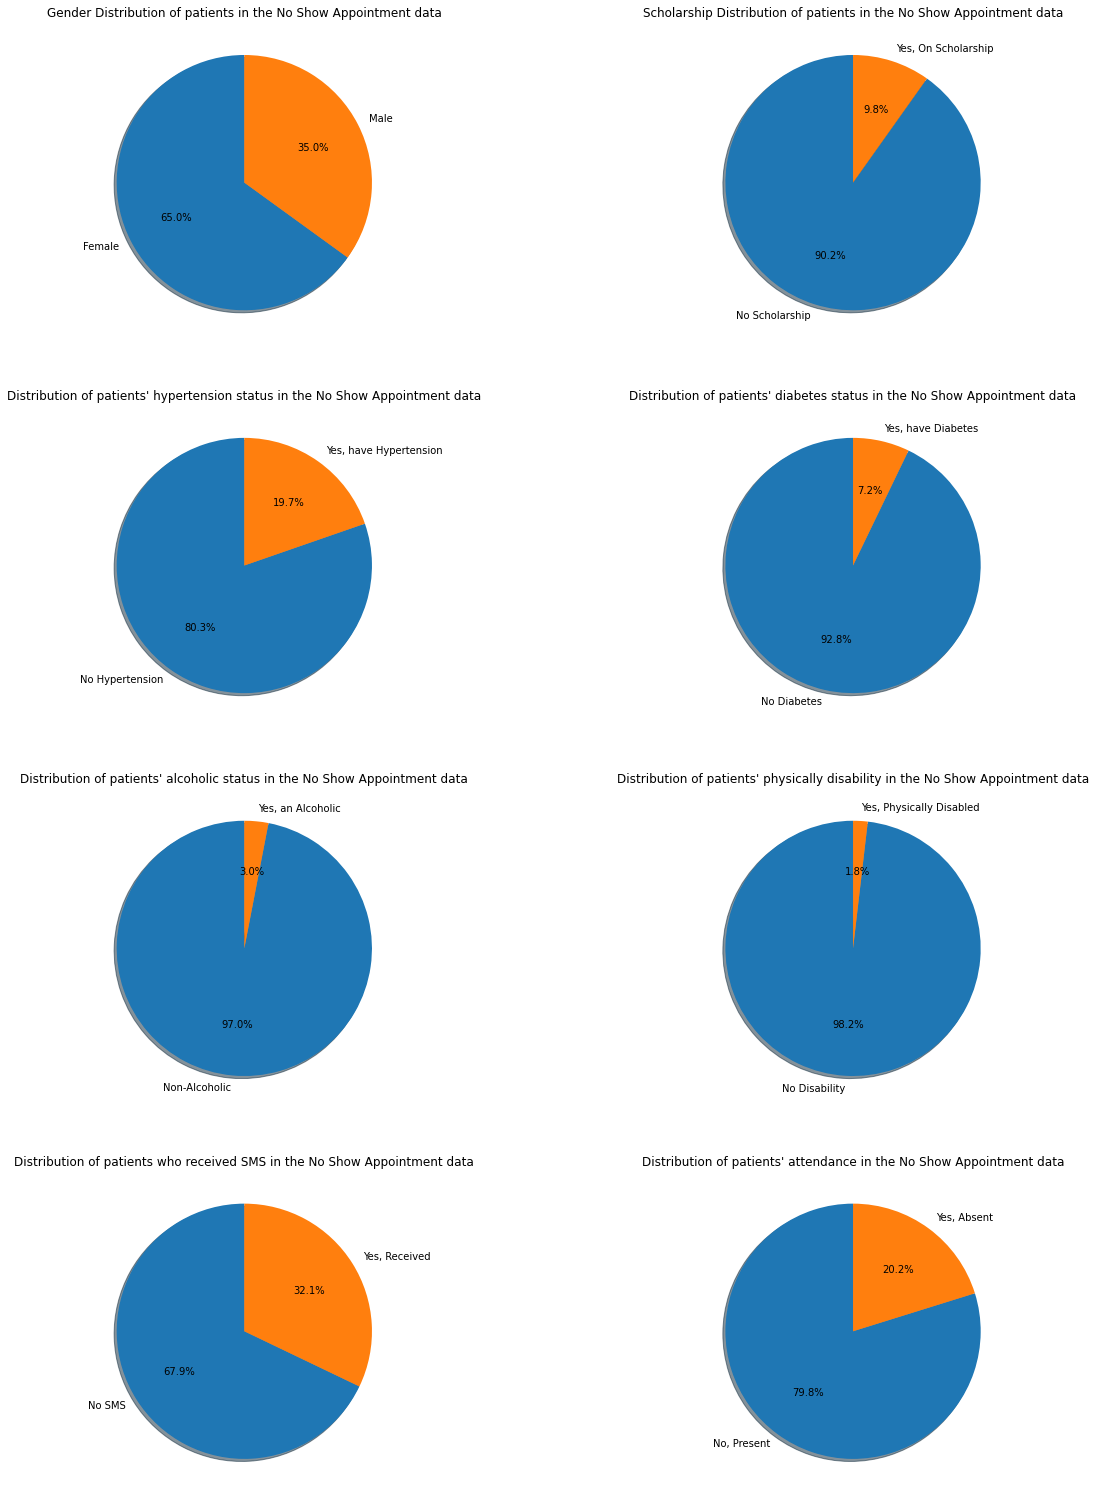

In [110]:
# Create individual plots showing the portion of each variables 
fig, ax = plt.subplots(4, 2, figsize=(20, 27))
ax[0,0].pie(dfpie['Gender'].value_counts(), labels=dfpie['Gender'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[0,0].set_title('Gender Distribution of patients in the No Show Appointment data');
ax[0,1].pie(dfpie['Scholarship'].value_counts(), labels=dfpie['Scholarship'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[0,1].set_title('Scholarship Distribution of patients in the No Show Appointment data');
ax[1,0].pie(dfpie['Hypertension'].value_counts(), labels=dfpie['Hypertension'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1,0].set_title('Distribution of patients\' hypertension status in the No Show Appointment data');
ax[1,1].pie(dfpie['Diabetes'].value_counts(), labels=dfpie['Diabetes'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1,1].set_title('Distribution of patients\' diabetes status in the No Show Appointment data');
ax[2,0].pie(dfpie['Alcoholism'].value_counts(), labels=dfpie['Alcoholism'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[2,0].set_title('Distribution of patients\' alcoholic status in the No Show Appointment data');
ax[2,1].pie(dfpie['Handcap'].value_counts(), labels=dfpie['Handcap'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[2,1].set_title('Distribution of patients\' physically disability in the No Show Appointment data');
ax[3,0].pie(dfpie['SMS_received'].value_counts(), labels=dfpie['SMS_received'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[3,0].set_title('Distribution of patients who received SMS in the No Show Appointment data');
ax[3,1].pie(dfpie['No-show'].value_counts(), labels=dfpie['No-show'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[3,1].set_title('Distribution of patients\' attendance in the No Show Appointment data');

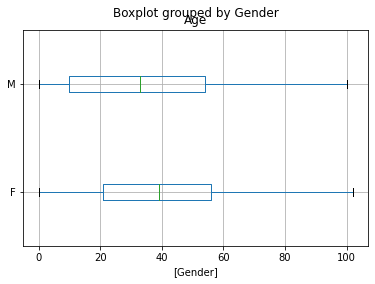

In [118]:
df[['Age', 'Gender']].boxplot(by='Gender', vert=False);

- _The dataset comprises of more women(female) than men(male)_
- _More than 

### Research Question 2  (Is there any impact of the health conditions and attendance at appoinment by the patients?)

<a id='conclusions'></a>
## Conclusions


## Submitting your Project 


In [119]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1